In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import re


In [11]:
# Use relative path from your notebook
df = pd.read_csv("../Datasets/haunted_places_combine.tsv", sep='\t')

In [12]:
df

,city,country,description,location,state,state_abbrev,longitude,latitude,city_longitude,city_latitude,Entity Labels,Entity Texts,GeoTopic Name,GeoTopic Latitude,GeoTopic Longitude
0,Ada,United States,Ada witch - Sometimes you can see a misty blue...,Ada Cemetery,Michigan,MI,-85.504893,42.962106,-85.495480,42.960727,"['ORG', 'QUANTITY', 'FAC', 'ORG', 'GPE', 'TIME...","['Ada witch -', '3-mile', 'the Ada Cemetery', ...",Ada Cemetery,42.96252,-85.50474
1,Addison,United States,A little girl was killed suddenly while waitin...,North Adams Rd.,Michigan,MI,-84.381843,41.971425,-84.347168,41.986434,"['DATE', 'DATE']","['in.1 month later', 'this day']",NaN,NaN,NaN
2,Adrian,United States,If you take Gorman Rd. west towards Sand Creek...,Ghost Trestle,Michigan,MI,-84.035656,41.904538,-84.037166,41.897547,"['FAC', 'GPE', 'CARDINAL', 'CARDINAL', 'TIME',...","['Gorman Rd', 'Sand Creek', 'one', 'one', 'Lat...",NaN,NaN,NaN
3,Adrian,United States,"In the 1970's, one room, room 211, in the old ...",Siena Heights University,Michigan,MI,-84.017565,41.905712,-84.037166,41.897547,"['DATE', 'CARDINAL', 'CARDINAL', 'DATE', 'CARD...","['1970', 'one', '211', 'today', 'one', 'two', ...",Sterling Heights,42.58031,-83.03020
4,Albion,United States,Kappa Delta Sorority - The Kappa Delta Sororit...,Albion College,Michigan,MI,-84.745177,42.244006,-84.753030,42.243097,"['ORG', 'CARDINAL']",['Kappa Delta Sorority - The Kappa Delta Soror...,Albion College Historical Marker,42.24662,-84.74420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10987,Westminster,United States,at 12 midnight you can see a lady with two lit...,city hall,Colorado,CO,-105.048936,39.862610,-105.037205,39.836653,"['TIME', 'CARDINAL', 'PERSON']","['12 midnight', 'two', 'Sheridan St.']",City Hall,51.50492,-0.07867
10988,Westminster,United States,Is haunted by the victims of a murder that hap...,Pillar of Fire,Colorado,CO,-105.032091,39.847237,-105.037205,39.836653,['DATE'],['years ago'],Pillar of Fire Church,41.41787,-75.06767
10989,Wheat Ridge,United States,The institution was for kids 18 years old and ...,Ridge Mental Institution,Colorado,CO,-105.063974,39.769726,-105.077206,39.766098,"['DATE', 'DATE', 'CARDINAL', 'CARDINAL']","['18 years old', '70', 'one', 'hundreds']",NaN,NaN,NaN
10990,Wheat Ridge,United States,Gymnasium - their have been reports of a litt...,Wheat Ridge Middle School,Colorado,CO,-105.103613,39.764055,-105.077206,39.766098,NaN,NaN,NaN,NaN,NaN


In [13]:
# Step 2: Filter rows with valid GeoTopic coordinates
geo_df = df.dropna(subset=['GeoTopic Latitude', 'GeoTopic Longitude'])

In [14]:
geo_df

,city,country,description,location,state,state_abbrev,longitude,latitude,city_longitude,city_latitude,Entity Labels,Entity Texts,GeoTopic Name,GeoTopic Latitude,GeoTopic Longitude
0,Ada,United States,Ada witch - Sometimes you can see a misty blue...,Ada Cemetery,Michigan,MI,-85.504893,42.962106,-85.495480,42.960727,"['ORG', 'QUANTITY', 'FAC', 'ORG', 'GPE', 'TIME...","['Ada witch -', '3-mile', 'the Ada Cemetery', ...",Ada Cemetery,42.96252,-85.50474
3,Adrian,United States,"In the 1970's, one room, room 211, in the old ...",Siena Heights University,Michigan,MI,-84.017565,41.905712,-84.037166,41.897547,"['DATE', 'CARDINAL', 'CARDINAL', 'DATE', 'CARD...","['1970', 'one', '211', 'today', 'one', 'two', ...",Sterling Heights,42.58031,-83.03020
4,Albion,United States,Kappa Delta Sorority - The Kappa Delta Sororit...,Albion College,Michigan,MI,-84.745177,42.244006,-84.753030,42.243097,"['ORG', 'CARDINAL']",['Kappa Delta Sorority - The Kappa Delta Soror...,Albion College Historical Marker,42.24662,-84.74420
5,Albion,United States,A mysterious lady in white has been spotted in...,Riverside Cemetery,Michigan,MI,-84.753056,42.236814,-84.753030,42.243097,NaN,NaN,Riverside Cemetery,38.79689,-107.73348
6,Algoma Township,United States,On a winding dirt road next to the Rogue River...,Hell's Bridge,Michigan,MI,NaN,NaN,-85.622930,43.149293,"['LOC', 'ORG', 'ORG', 'TIME', 'DATE', 'PERSON'...","['the Rogue River', 'Friske', ""Hell's Bridge"",...",Rogue River,42.43595,-123.17200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10983,Sterling,United States,"It is known that if you enter room 104, that y...",Ramada inn,Colorado,CO,-103.160196,40.624004,-103.207709,40.625541,['CARDINAL'],['104'],Ramada Inn St Thomas On,42.77460,-81.17780
10985,Thornton,United States,Riverdale Road is a circuitous and meandering ...,Riverdale Road,Colorado,CO,-104.904567,39.909158,-104.971924,39.868041,"['GPE', 'GPE', 'LOC', 'GPE', 'DATE', 'GPE', 'P...","['Denver', 'Brighton', 'South Platte River', '...",City of Sugar Land,29.59559,-95.62824
10986,Walsenburg,United States,"half of the building was burned, and at one ti...",catholic school,Colorado,CO,-104.779305,37.622776,-104.780265,37.624179,"['CARDINAL', 'CARDINAL']","['half', 'one']",Madrasah wa Kanīsat al Qiddīsat Mārī,25.24028,55.31779
10987,Westminster,United States,at 12 midnight you can see a lady with two lit...,city hall,Colorado,CO,-105.048936,39.862610,-105.037205,39.836653,"['TIME', 'CARDINAL', 'PERSON']","['12 midnight', 'two', 'Sheridan St.']",City Hall,51.50492,-0.07867


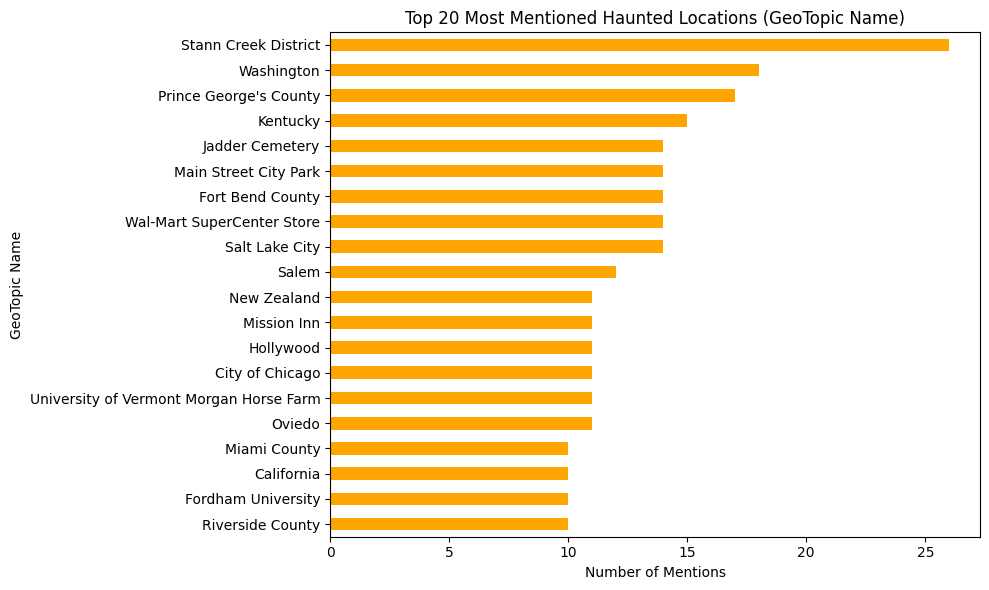

In [15]:
top_locations = geo_df['GeoTopic Name'].value_counts().nlargest(20)

plt.figure(figsize=(10, 6))
top_locations.plot(kind='barh', color='orange')
plt.gca().invert_yaxis()
plt.title('Top 20 Most Mentioned Haunted Locations (GeoTopic Name)')
plt.xlabel('Number of Mentions')
plt.tight_layout()
plt.show()

## Top Haunted Locations by State or City

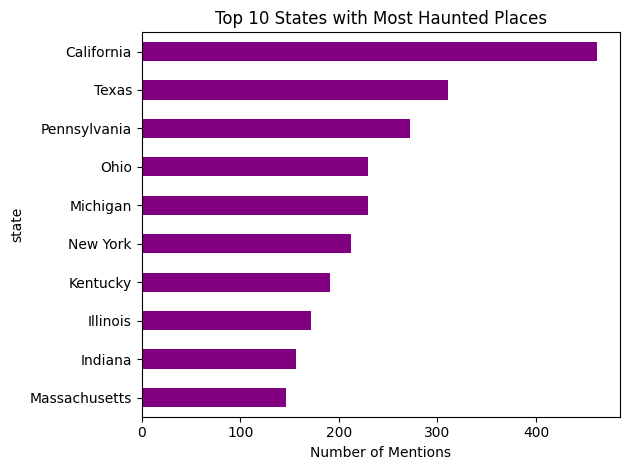

In [22]:
# Top states with the most haunted mentions
top_states = geo_df['state'].value_counts().nlargest(10)

# Plot
top_states.plot(kind='barh', title='Top 10 States with Most Haunted Places', color='purple')
plt.gca().invert_yaxis()
plt.xlabel('Number of Mentions')
plt.tight_layout()
plt.show()


## Location Name Word Frequency

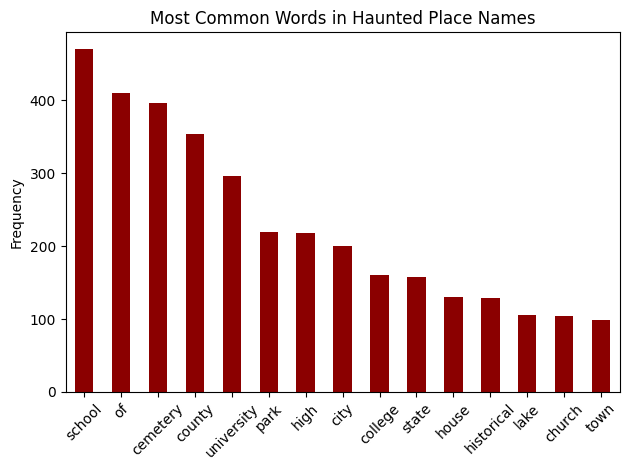

In [24]:
# Combine all GeoTopic Names
all_names = ' '.join(geo_df['GeoTopic Name'].dropna())
words = re.findall(r'\b\w+\b', all_names.lower())
word_counts = Counter(words)

# Top 15 common words
common_words = pd.Series(dict(word_counts)).sort_values(ascending=False).head(15)

# Plot
common_words.plot(kind='bar', title='Most Common Words in Haunted Place Names', color='darkred')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Same Place, Multiple Descriptions    

In [28]:
# Look at top-mentioned GeoTopic Name entries
top_places = geo_df['GeoTopic Name'].value_counts().nlargest(5).index
for place in top_places:
    print(f"\n--- {place} ---")
    print('\n'.join(df[df['GeoTopic Name'] == place]['description'].head(5).tolist()))



--- Stann Creek District ---
Old Bush Creek Cemetery - There is a great deal of history to this site. It is haunted by spirits of Choctaw Indians who were attacked by English settlers many years ago. You can see shadows of things, negative entities, as well as the sound of footsteps in the grass.
The Creek behind the baby zoo at the Happy hallow park, is haunted by a lady wearing a short red dress with a black belt and long black hair, she is believed to have been murdered there in the 70's.
Owner, workers and guests at this lovely Victorian inn built in the late 1800's have all seen the apparition of a vampire creature with blood dripping from his mouth. And passing motorists on the old country freeways have seen him as well. One such story which made national news was when two hikers in the area witnessed the vampire while hiking around the wolf creek area, then later that night at the hotel they were bitten on the neck by the creature when they were in bed and it left strange unide